In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification, load_wine, load_breast_cancer, load_diabetes, load_digits

In [21]:
plt.style.use('seaborn-darkgrid')

In [22]:
def plot_scatter(x, y, auto_scaled=True, title=None, clusters=None):
    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, c=clusters, cmap='bwr')
    
    if not auto_scaled:
        plt.axis('square')
    
    plt.grid(True)
    plt.title(title)
    
    plt.show()
    
def return_X_y(data, target_column):
    return data.drop(target_column, axis=1), data[target_column]

In [23]:
wine_sklearn = load_wine(as_frame=True)
wine_data, wine_labels = wine_sklearn['data'], wine_sklearn['target']

# Homework

## Exercise  1 - Scaling (2 points)

Perform standardization for wine dataset (`wine_data`) using only basic python, numpy and pandas (without using `StandardScaler` and sklearn at all). Implementation of function (or class) that can get dataset as input and return standardized dataset as output is preferrable, but not necessary.

Compare you results (output) with `StandardScaler`.

**NOTE:**

- 1 point for functional version, 2 points for implementing scaling as sklearn pipeline compartible class. 
- Maximum for the exercise is 2 points.


### Simple version (1 point)

In [24]:
# 1 point
def scale(X):
    X = np.array(X, dtype=np.float64)
    return (X - X.mean(axis=0)) / X.std(axis=0)

In [25]:
assert np.allclose(np.array(scale(wine_data)), StandardScaler().fit_transform(wine_data))

### Pipeline Version (2 points)

In [26]:
# 2 points
from sklearn.base import BaseEstimator, TransformerMixin
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self, copy=True, with_mean=True, with_std=True):
        pass

    def fit(self, X, y=None):
        self.X_mean = np.array(X).mean(axis=0)
        self.X_std = np.array(X).std(axis=0)
        return self

    def transform(self, X, y=None, copy=None):
        return (np.array(X) - self.X_mean) / self.X_std

In [27]:
assert np.allclose(CustomScaler().fit_transform(wine_data), StandardScaler().fit_transform(wine_data))

## Exercise  2 - Visualization (3 points)

As noted earlier, standardization/normalization of data can be crucial for some distance-based ML methods.

Let’s generate some toy example of unnormalized data and visualize the importance of this process once more:

In [28]:
feature_0 = np.random.randn(1000) * 10   
feature_1 = np.concatenate([np.random.randn(500), np.random.randn(500) + 5])
data = np.column_stack([feature_0, feature_1])
data 

array([[  4.38717892,   0.92721288],
       [-16.83057128,   0.31847798],
       [  1.41724951,   0.05368343],
       ...,
       [  0.66665372,   5.43802865],
       [ -6.35884081,   5.86312795],
       [ -7.24237646,   4.70719171]])

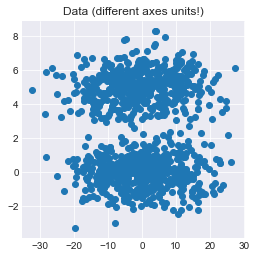

In [29]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=True, title='Data (different axes units!)')

**NOTE:** on the plot above axes are scaled differently and we can clearly see two potential *classes/clusters*. In fact `matplotlib` performed `autoscaling` (which is basically can be considered as `MinMaxScaling` of original data) just for better visualization purposes.

Let's turn this feature off and visualize the original data on the plot with equally scaled axes:

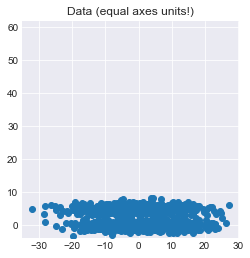

In [30]:
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False , title='Data (equal axes units!)')

This picture is clearly less interpretable, but much closer to "how distance-based algorithm see the original data": separability of data is hardly noticable only because the variation (std) of x-feature is much bigger in absolute numbers.

Perform `StandardScaling` and `MinMaxScaling` of original data; visualize results for each case (**use `plot_scatter` with `auto_scaled=False`**):

### MinMaxScaling (0.5 point)

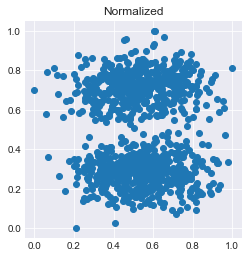

In [31]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(data)
plot_scatter(minmax_scaled[:, 0], minmax_scaled[:, 1], auto_scaled=False , title='Normalized')

### StandardScaler (0.5 point)

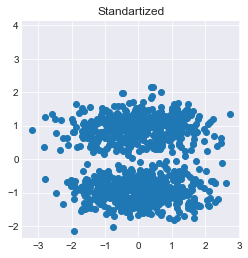

In [32]:
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(data)
plot_scatter(standard_scaled[:, 0], standard_scaled[:, 1], auto_scaled=False , title='Standartized')

### (Bonus) K-means (2 points)

Illustrate the impact of scaling on basic distance-based clustering algorithm [K-means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) using `data` generated above.

**NOTE:** basically, you don't need understanding K-means algorithm here, you just need to:

1) run algorithm (with k=2, k - number of clusters/classes) on unscaled data    
2) run algorithm (with k=2) on scaled data    
3) plot results: highlight different clusters using different colors.

You can use this [question](https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering/89813) as a hint, but I recommend you to plot results using `plot_scatter` with `equal_scaled=True`: it might help you to intuitively understand the reasons of such scaling impact.


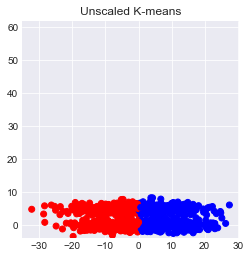

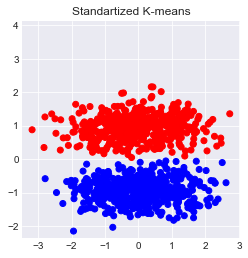

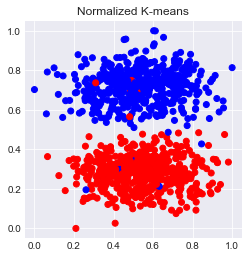

In [33]:
from sklearn.cluster import KMeans

k_means = KMeans(2)

unscaled_clusters = k_means.fit_predict(data)
plot_scatter(data[:, 0], data[:, 1], auto_scaled=False , title='Unscaled K-means', clusters=unscaled_clusters)

scaled_clusters = k_means.fit_predict(standard_scaled)
plot_scatter(standard_scaled[:, 0], standard_scaled[:, 1], auto_scaled=False , title='Standartized K-means', clusters=scaled_clusters)

normalized_clusters = k_means.fit_predict(mm_scaled)
plot_scatter(minmax_scaled[:, 0], minmax_scaled[:, 1], auto_scaled=False , title='Normalized K-means', clusters=normalized_clusters)